Property type
¿El tipo de propiedad se correlaciona con el precio por metro cuadrado?
¿Que cosas podemos decir?

In [140]:

data_location = "properati.csv"

df = pd.read_csv(data_location)

df.head(2)

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,40.0,1127.272727,1550.0,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...


In [141]:
import pandas as pd
import numpy as np
import re

## Tipos de propiedad presentes en el DF

In [142]:
## Tipos de propiedad
df.property_type.value_counts()

apartment    71065
house        40268
PH            5751
store         4136
Name: property_type, dtype: int64

## Ploteadas

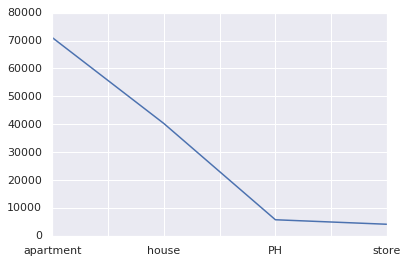

In [143]:
# Tipos de propiedad ploteadas

df.property_type.value_counts().plot()

In [144]:
df.property_type.describe()

count        121220
unique            4
top       apartment
freq          71065
Name: property_type, dtype: object

# Visualizamos propiedad y superficie

In [145]:
propiedadysuperficie = df[["property_type","surface_covered_in_m2"]]

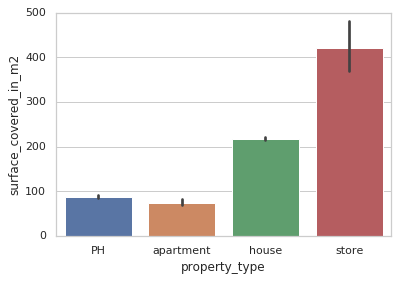

In [146]:
import seaborn as sns

sns.set(style="whitegrid")

tips = sns.load_dataset("tips")

ax = sns.barplot(x="property_type", y="surface_covered_in_m2", data=propiedadysuperficie)

# Visualizamos propiedad y precio

In [147]:
propiedadypreciousd = df[["property_type","price_usd_per_m2"]]
df

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,...,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...
3,3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15boh_venta_ph_lin...,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SP...
4,4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,...,35.0,1828.571429,1828.571429,NaN,NaN,NaN,http://www.properati.com.ar/15bok_venta_depart...,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,https://thumbs4.properati.com/5/xrRqlNcSI_vs-f...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121215,121215,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,NaN,NaN,...,93.0,7699.115044,9354.838710,NaN,NaN,10000.0,http://www.properati.com.ar/1cja2_venta_depart...,TORRE FORUM ALCORTA - MÁXIMA CATEGORÍA.Impecab...,Torre Forum Alcorta- Impecable 3 ambientes,https://thumbs4.properati.com/1/bjms0KnaAnlNoQ...
121216,121216,sell,house,Beccar,|Argentina|Bs.As. G.B.A. Zona Norte|San Isidro...,Argentina,Bs.As. G.B.A. Zona Norte,3436080.0,NaN,NaN,...,360.0,1383.333333,1383.333333,NaN,NaN,NaN,http://www.properati.com.ar/1cja6_venta_casa_b...,Excelente e impecable casa en Venta en Las Lom...,Ruca Inmuebles | Venta | Lomas de San Isidro |...,https://thumbs4.properati.com/2/PCc3WuQDjpNZc4...
121217,121217,sell,apartment,Villa Urquiza,|Argentina|Capital Federal|Villa Urquiza|,Argentina,Capital Federal,3433775.0,"-34.5706388726,-58.4755963355",-34.570639,...,39.0,2858.695652,3371.794872,NaN,NaN,NaN,http://www.properati.com.ar/1cja7_venta_depart...,VENTA DEPARTAMENTO AMBIENTE DIVISIBLE A ESTREN...,VENTA DEPARTAMENTO AMBIENTE DIVISIBLE A ESTREN...,https://thumbs4.properati.com/9/YAe_-2gRVykADP...
121218,121218,sell,apartment,Plaza Colón,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,NaN,NaN,NaN,...,48.0,1997.916667,1997.916667,NaN,NaN,NaN,http://www.properati.com.ar/1cja8_venta_depart...,"2 Amb al contrafrente, luminoso. El departame...",2 amb. C/ dep. de servicio al contrafrente| Re...,https://thumbs4.properati.com/8/Q12PTvU6BQJ0ib...


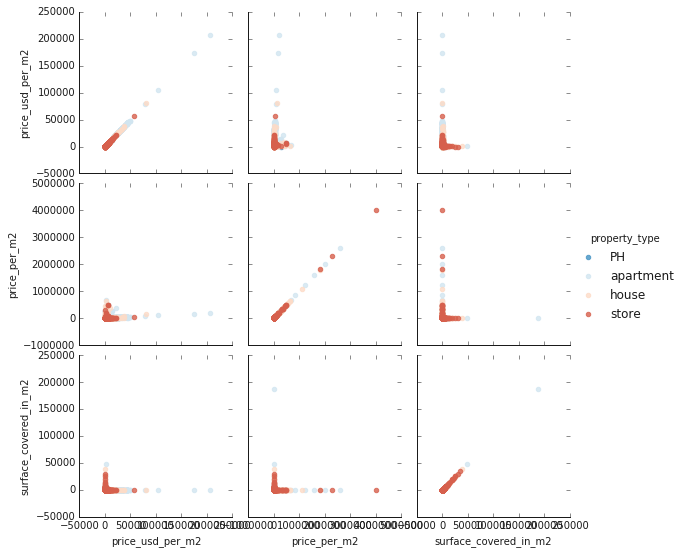

In [13]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd


g = sns.PairGrid(df, vars=['price_usd_per_m2', 'price_per_m2', 'surface_covered_in_m2'],
                 hue='property_type', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend();


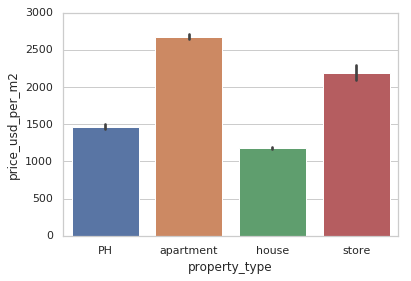

In [14]:
import seaborn as sns

sns.set(style="whitegrid")

tips = sns.load_dataset("tips")

ax = sns.barplot(x="property_type", y="price_usd_per_m2", data=propiedadypreciousd)

In [15]:
ax = sns.violinplot(x="property_type", y="price_usd_per_m2", data=propiedadypreciousd,palette = palette_suburb )

NameError: name 'palette_suburb' is not defined

In [ ]:
df[["property_type","place_name"]].describe()

# Exportamos latitud y longitud en caso de que pueda georeferenciar

In [ ]:
#exportamoslatylong

latylongdelproyecto  = df[["lat-lon","lat"]]

latylongdelproyecto.to_csv (r'/home/thomas/Documentos/Trabajo DH/latylong', index = False, header=True)

## Armamos máscaras para cada tipo de propiedad

In [ ]:
apartment_mask = df.property_type == "apartment"
apartment = df[apartment_mask]
apartment.head(2)

In [ ]:
house_mask = df.property_type == "house"
house = df[house_mask]


In [ ]:
store_mask = df.property_type == "store"
store = df[store_mask]
store.head(2)

In [ ]:
PH_mask = df.property_type == "PH"
PH = df[PH_mask]
PH

# Armo una variable con las columnas que me interesan

In [ ]:
dfnuevo= df[["property_type","state_name", "price_usd_per_m2"]]
dfnuevo.head(3)

In [ ]:
## Armo groupby y agrupo por propiedad

dfnuevo.groupby("property_type").price_usd_per_m2.describe()

# Tiro un pivot con index de state_name y valores generales

In [ ]:
dfnuevo.pivot_table(index= "state_name", columns= "property_type", values= "price_usd_per_m2")

In [ ]:
## Tiro groupby y tiro por state_name

stateyprop = dfnuevo.groupby("state_name").property_type.describe()

stateyprop



In [ ]:
## Agarro las columnas de state_name y count, que muestra la cantidad de propiedades
stateypropfiltrado = stateyprop.iloc[:,0:1]
stateypropfiltrado

# Dejo esta máscara limpia para plotear más adelante

In [ ]:


mask1 = stateypropfiltrado > 500
reducido = stateypropfiltrado[mask1] 
reducidolimpio = reducido.dropna()
reducidolimpio

# ¿El tipo de propiedad se correlaciona con el precio por m2?

In [16]:
df.head(2)

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,40.0,1127.272727,1550.0,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...


In [17]:
mascaradenulos = df.price_usd_per_m2.isnull()
nulosprice= df.price_usd_per_m2[mascaradenulos]
nulosprice.shape

(52603,)

In [18]:
prieperusdnotnull= df["price_usd_per_m2"].isnull() ==0

dfpriceusdnotnull = df.loc[prieperusdnotnull, :]
print(dfpriceusdnotnull["property_type"].value_counts())

apartment    42887
house        20359
PH            3254
store         2117
Name: property_type, dtype: int64


In [19]:
# quiero ver la distribucion de los not null por state_name
dfpriceusdnotnull['state_name'].value_counts()

Capital Federal                 23434
Bs.As. G.B.A. Zona Norte        17405
Buenos Aires Costa Atlántica     6350
Bs.As. G.B.A. Zona Sur           6173
Bs.As. G.B.A. Zona Oeste         4623
Santa Fe                         3960
Córdoba                          3674
Buenos Aires Interior            1011
Corrientes                        315
Mendoza                           314
Neuquén                           240
Río Negro                         215
Misiones                          193
Tucumán                           181
San Luis                          137
Chubut                            125
Entre Ríos                         82
Salta                              63
Formosa                            29
Chaco                              28
Tierra Del Fuego                   28
Santa Cruz                         11
La Pampa                           10
Catamarca                           6
Jujuy                               4
Santiago Del Estero                 3
San Juan    

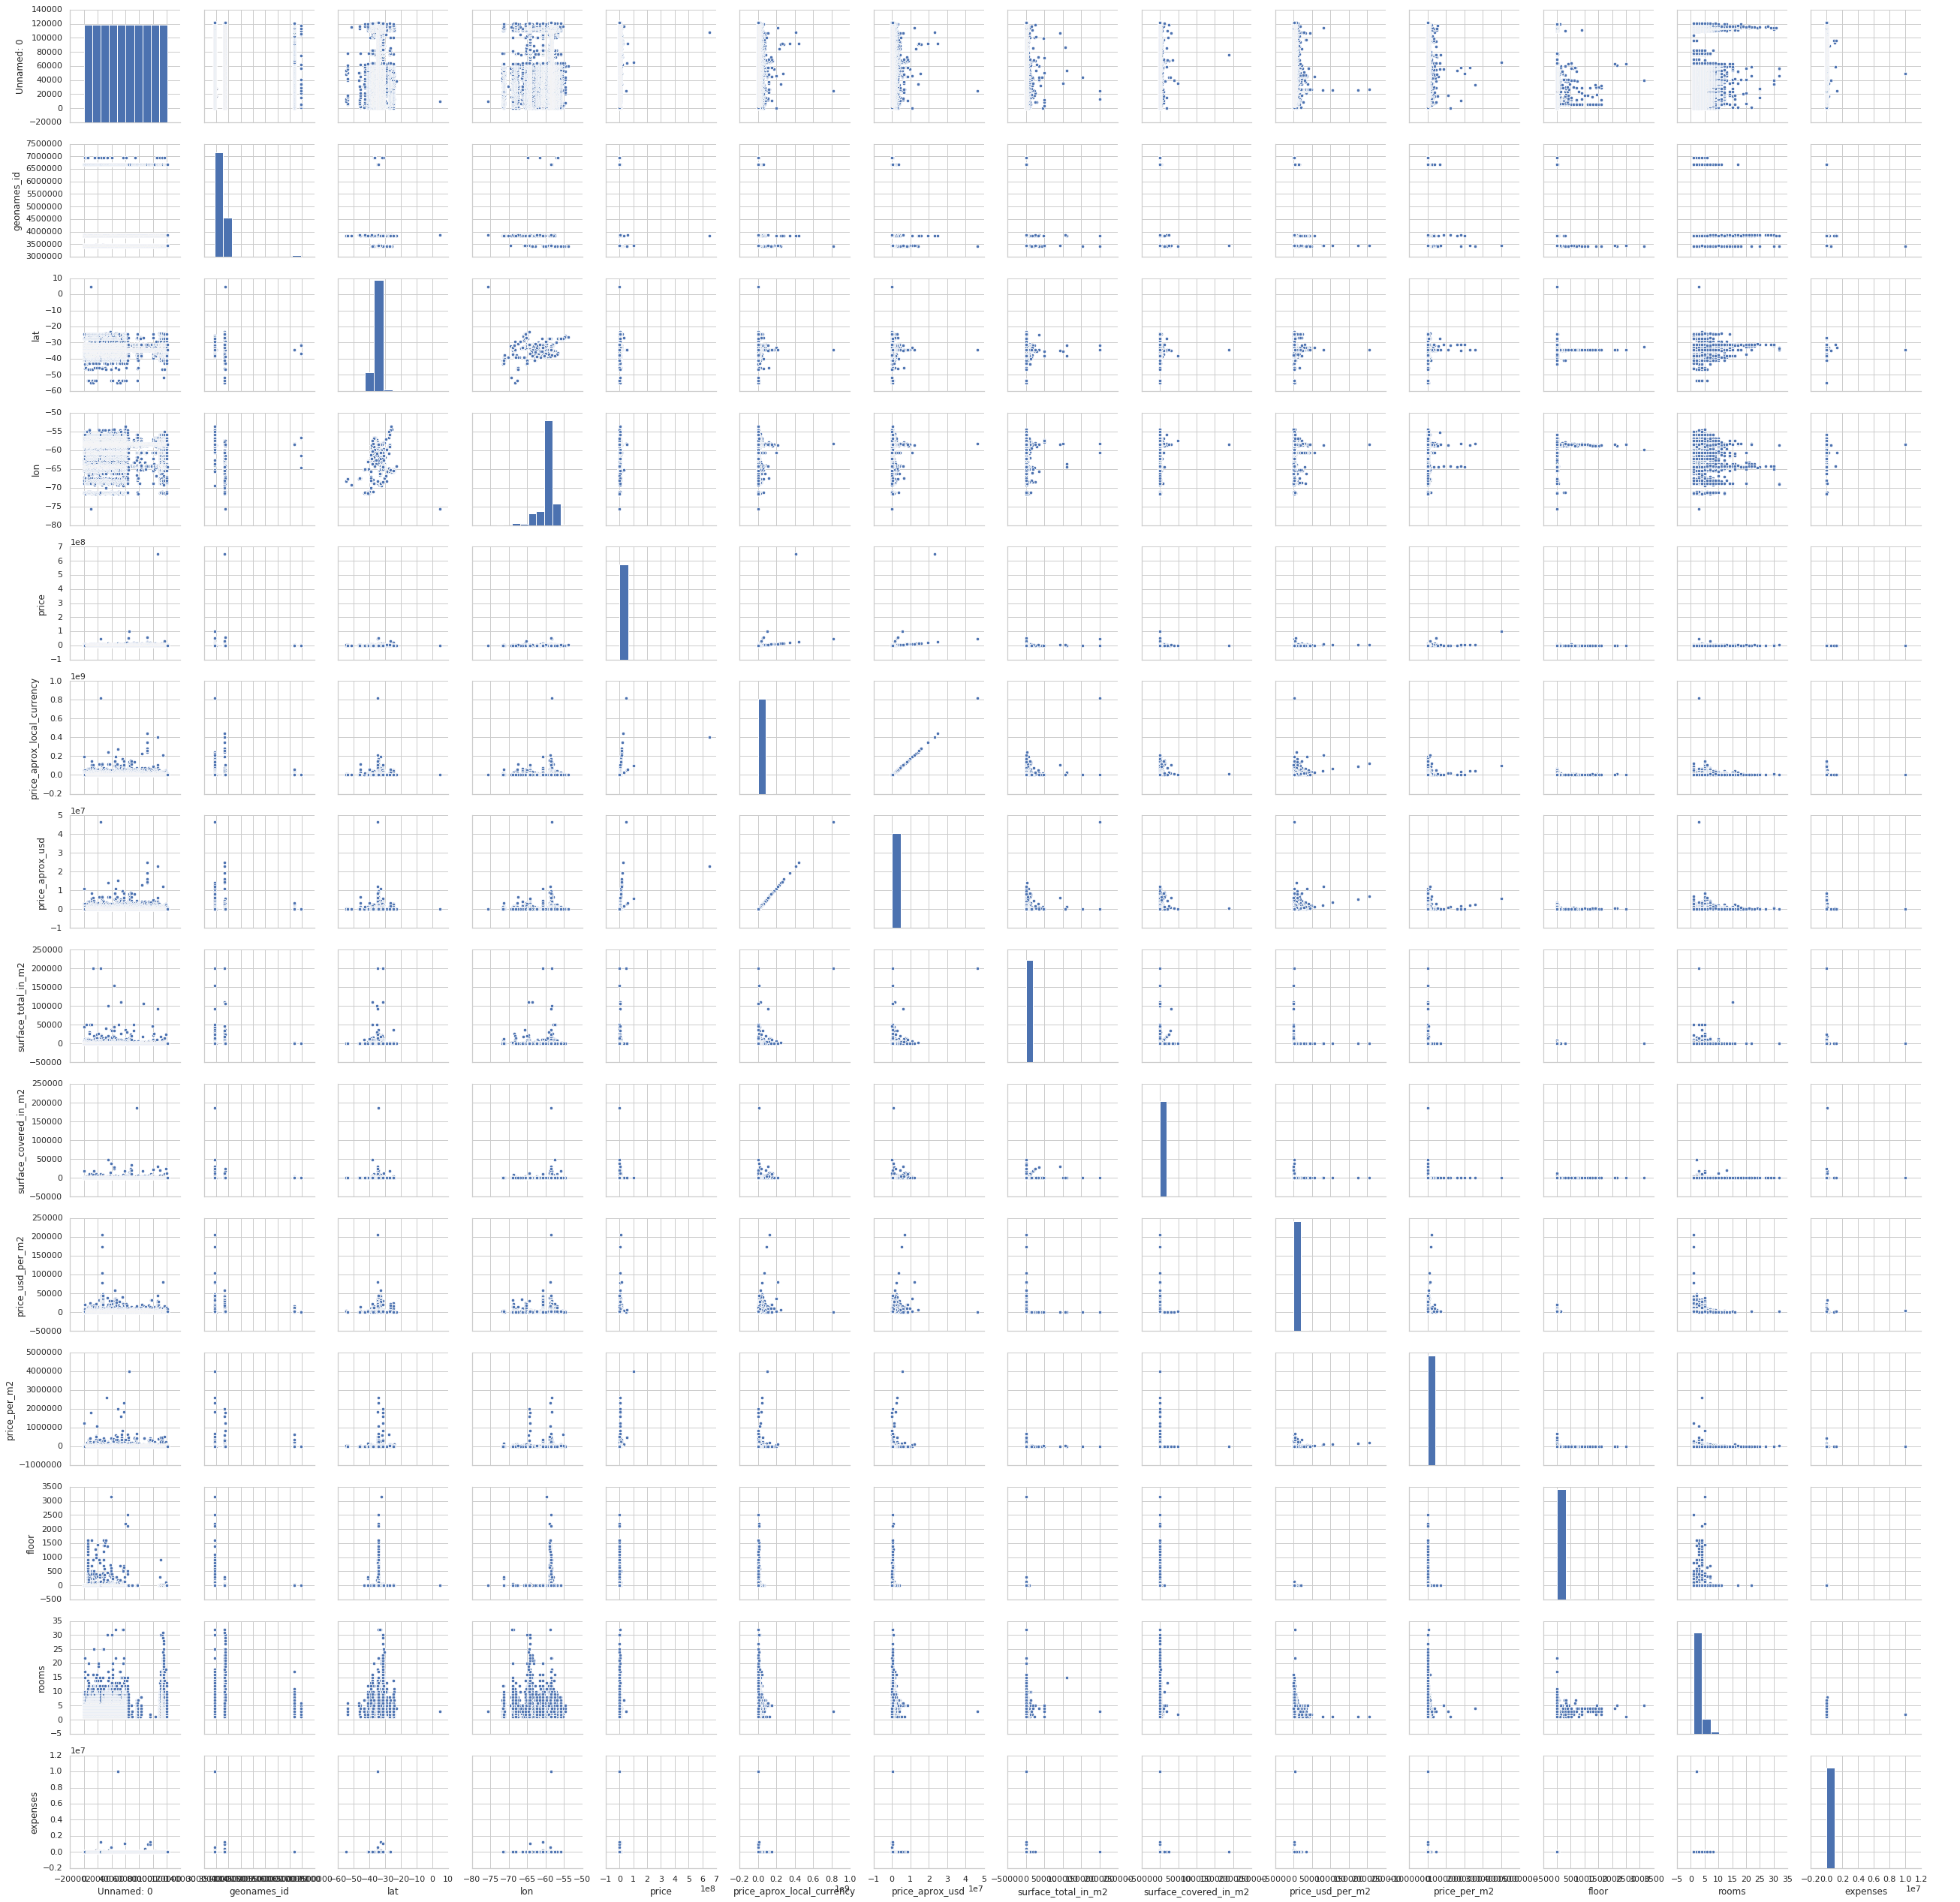

In [21]:
sb.pairplot(df)


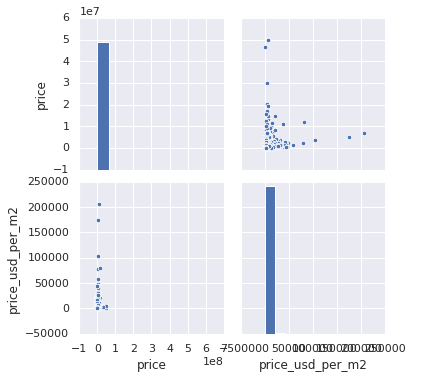

In [54]:
x= df[["price","price_usd_per_m2"]]
sb.pairplot(x)

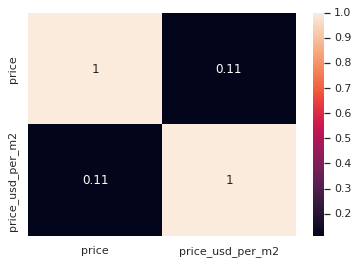

In [55]:
corrMatrix = x.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [57]:
x.corr("pearson")

,price,price_usd_per_m2
price,1.000000,0.111961
price_usd_per_m2,0.111961,1.000000


## Graficamos el top 10 de estados con más propiedades


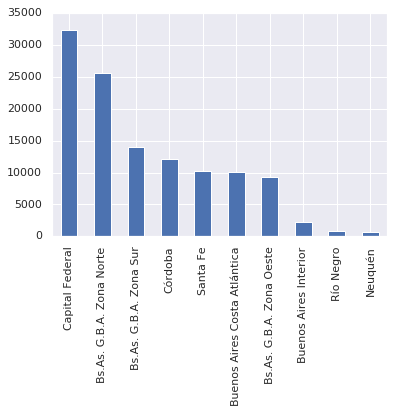

In [65]:

state_name = df["state_name"].value_counts().iloc[0:10]
state_name

import matplotlib.pyplot as plt
import pandas as pd

# a simple line plot
state_name.plot(kind='bar',x='name',y='age')


## Top 10 ciudades con más propiedades

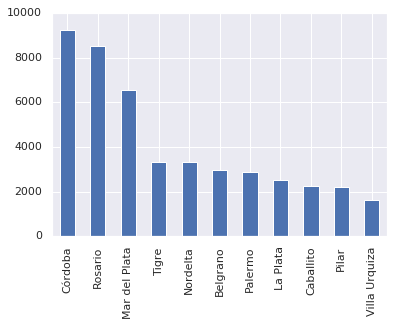

In [111]:
df.place_name.value_counts().iloc[0:11].plot(kind='bar')